<a href="https://colab.research.google.com/github/Vivekanand1435/EDA-and-Visualization/blob/main/Battery_RUL_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import os

In [6]:
# Load dataset
battery_df = pd.read_csv("/content/Battery_RUL.csv")
print(battery_df.shape)
battery_df.head()

(15064, 9)


,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [7]:
battery_df.columns

Index(['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
       'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)',
       'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)',
       'RUL'],
      dtype='object')

**Data description**

In [8]:
battery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [11]:
# no missing data
battery_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cycle_Index,15064.0,556.155005,322.378480,1.000,271.000000,560.000000,833.0000,1134.000
Discharge Time (s),15064.0,4581.273960,33144.012077,8.690,1169.310000,1557.250000,1908.0000,958320.370
Decrement 3.6-3.4V (s),15064.0,1239.784672,15039.589269,-397645.908,319.600000,439.239471,600.0000,406703.768
Max. Voltage Dischar. (V),15064.0,3.908176,0.091003,3.043,3.846000,3.906000,3.9720,4.363
Min. Voltage Charg. (V),15064.0,3.577904,0.123695,3.022,3.488000,3.574000,3.6630,4.379
Time at 4.15V (s),15064.0,3768.336171,9129.552477,-113.584,1828.884179,2930.203500,4088.3265,245101.117
Time constant current (s),15064.0,5461.266970,25155.845202,5.980,2564.310000,3824.260000,5012.3500,880728.100
Charging time (s),15064.0,10066.496204,26415.354121,5.980,7841.922500,8320.415000,8763.2825,880728.100
RUL,15064.0,554.194172,322.434514,0.000,277.000000,551.000000,839.0000,1133.000


**EDA**

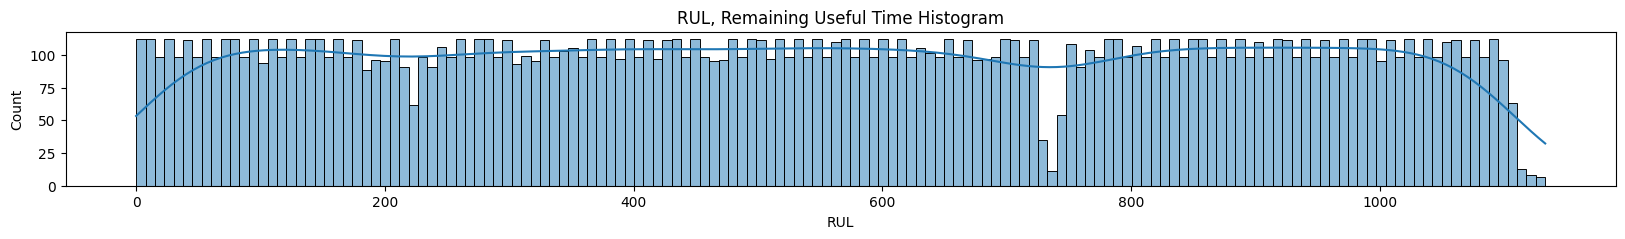

In [13]:
plt.figure(figsize=(20, 2))
plt.title('RUL, Remaining Useful Time Histogram')
sns.histplot(battery_df.RUL, bins=150, kde=True)
plt.show()

<Axes: xlabel='Max. Voltage Dischar. (V)', ylabel='Density'>

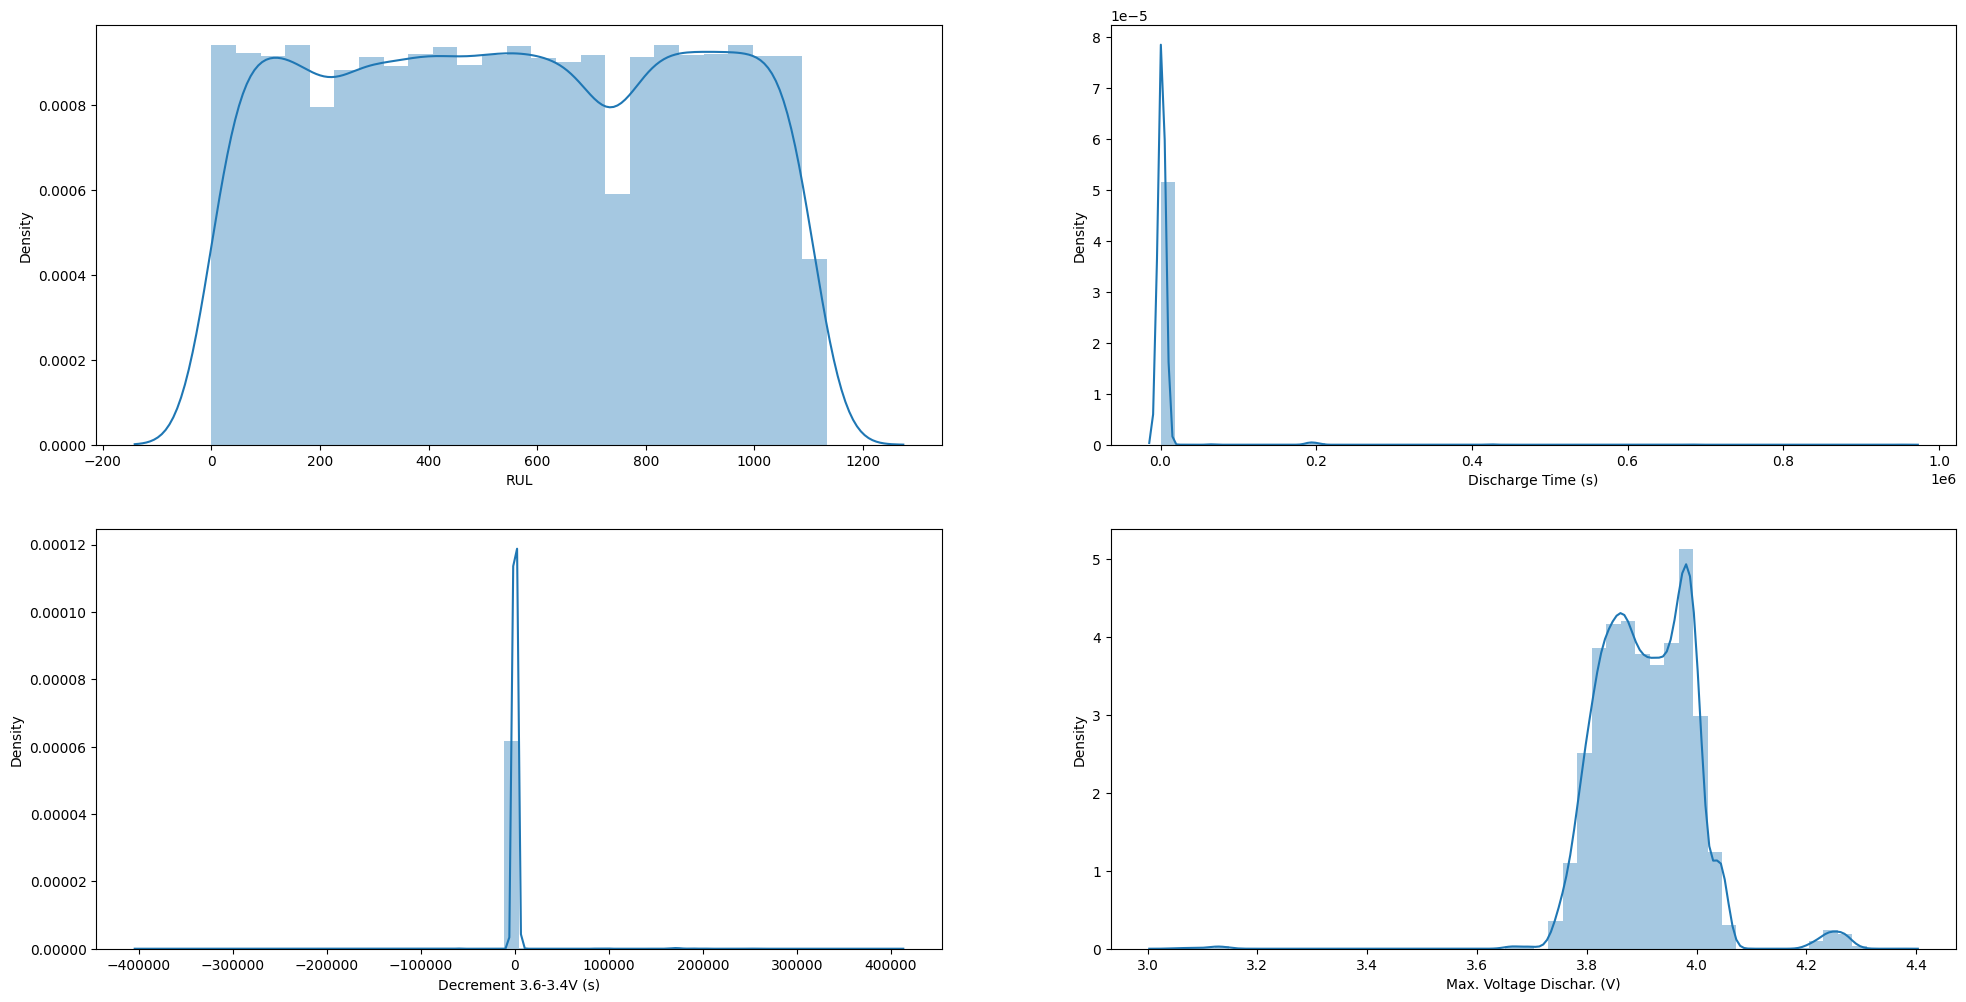

In [25]:
# it is not a normal distribution.
# data distribution
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(24,12))
sns.distplot(battery_df['RUL'], ax=ax[0,0])      # target
sns.distplot(battery_df['Discharge Time (s)'], ax=ax[0,1])
sns.distplot(battery_df['Decrement 3.6-3.4V (s)'], ax=ax[1,0])
sns.distplot(battery_df['Max. Voltage Dischar. (V)'], ax=ax[1,1])

<Axes: xlabel='Charging time (s)', ylabel='Density'>

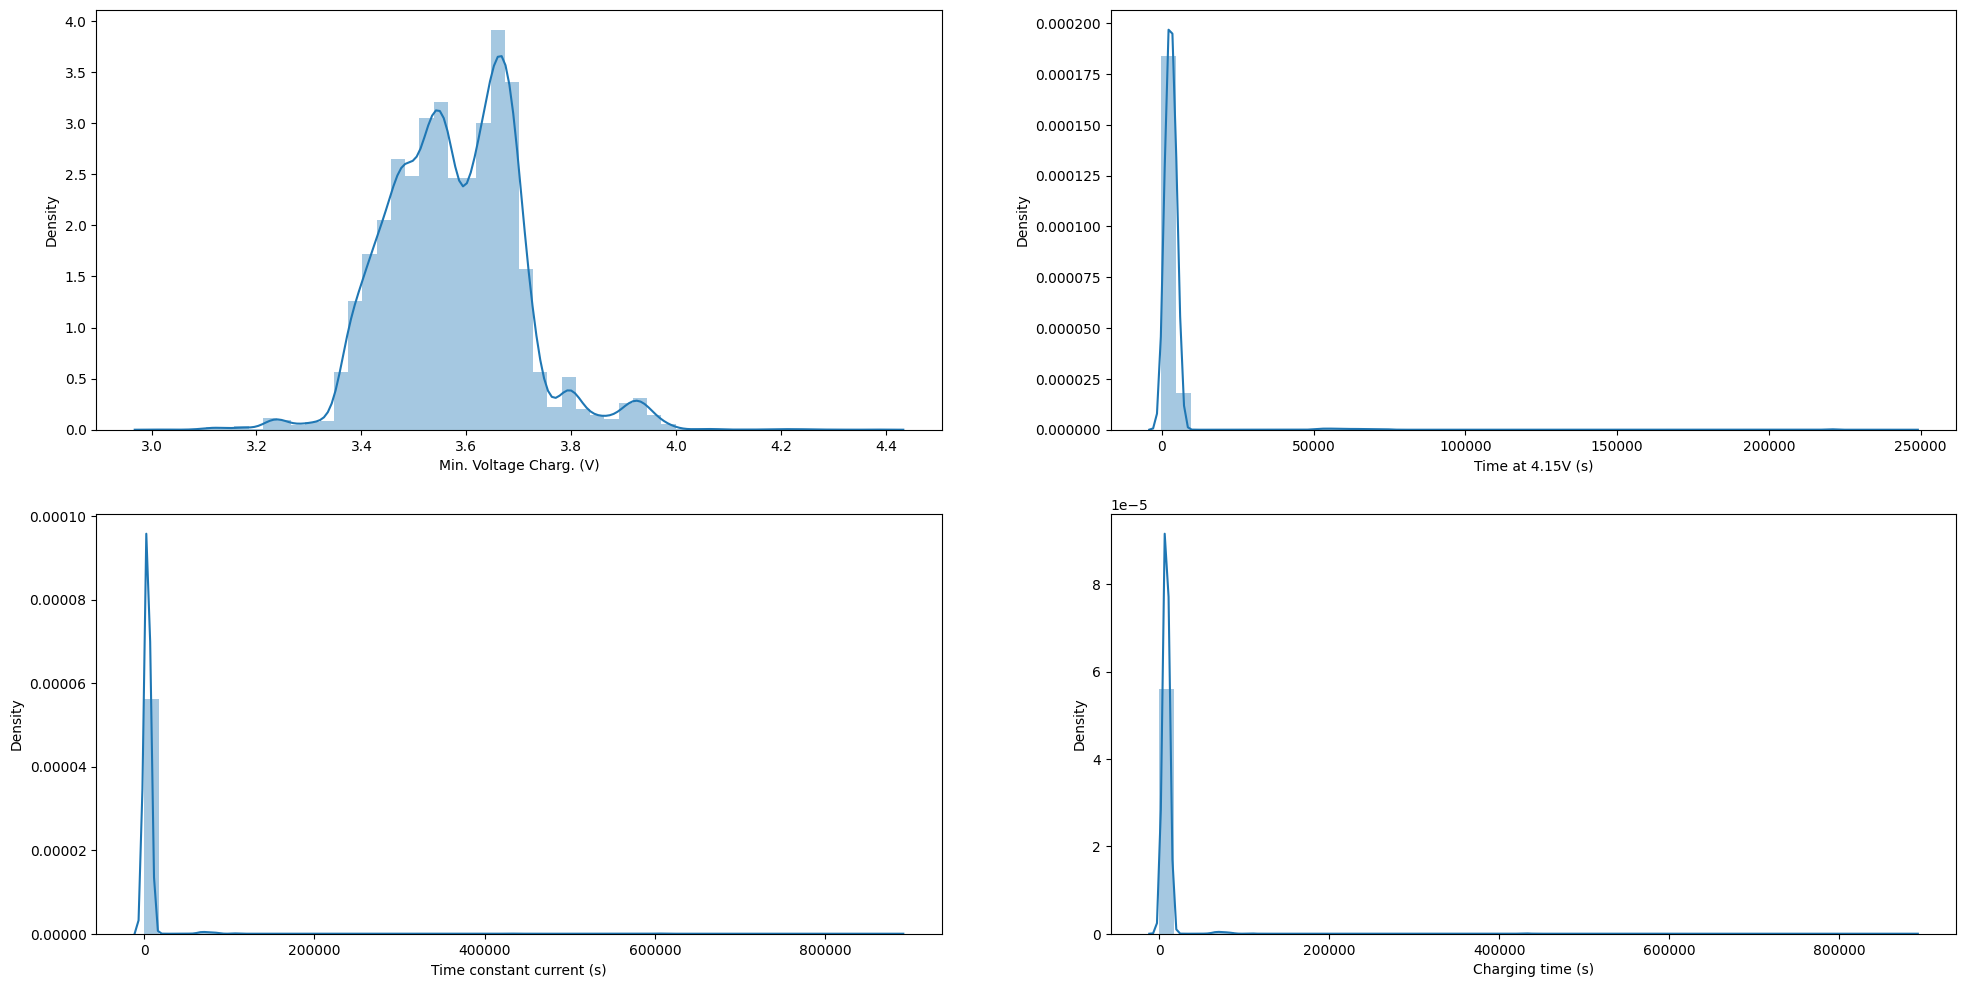

In [32]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(24,12))
sns.distplot(battery_df['Min. Voltage Charg. (V)'], ax=ax[0,0])
sns.distplot(battery_df['Time at 4.15V (s)'], ax=ax[0,1])
sns.distplot(battery_df['Time constant current (s)'], ax=ax[1,0])
sns.distplot(battery_df['Charging time (s)'], ax=ax[1,1])

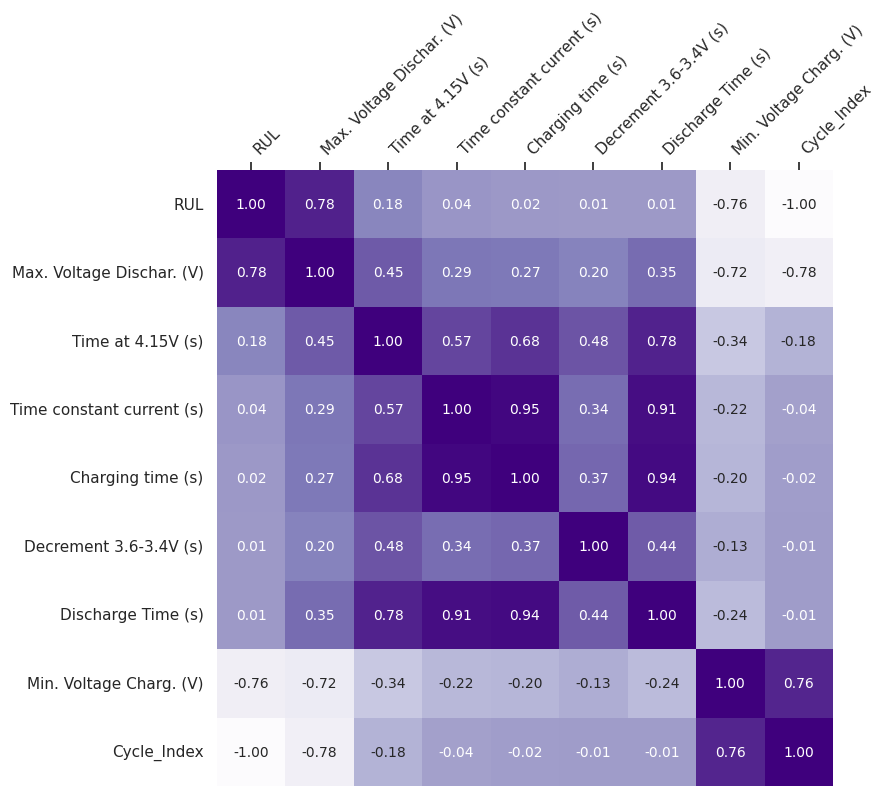

In [37]:
# Correlation
corrmat = battery_df.corr()
plt.figure(figsize=(8, 8))
k=9
cols =corrmat.nlargest(k,'RUL')['RUL'].index
cm =np.corrcoef(battery_df[cols].values.T)
sns.set(font_scale=1.0)
hm = sns.heatmap(cm, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values,cmap="Purples")
hm.xaxis.tick_top()
plt.xticks(rotation=45, ha='left')
plt.show()